In [1]:
import os
import operator
import arcgis

#connect to GIS
from arcgis.gis import GIS
gis = GIS('home')

#Import the training samples
PascalData = 'D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Objects/Tests/UTMCarsV3_Pascal_416_224_MO5'

OutputModels = 'D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/'

In [24]:
#Collect garbage to try to free up GPU memory after runs
import gc

gc.collect()

5230

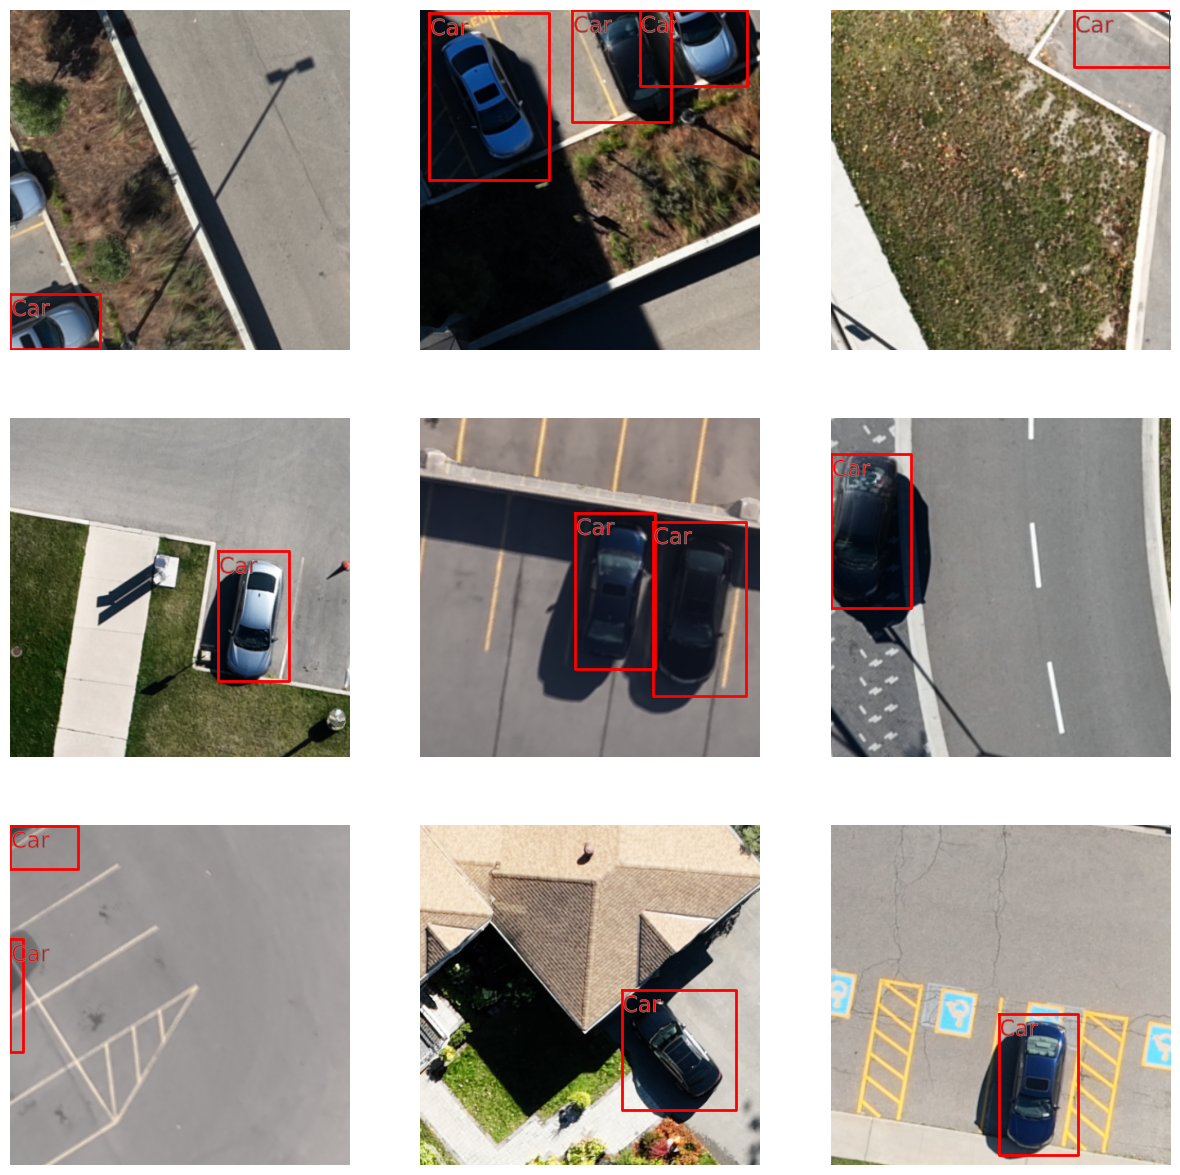

In [2]:
#Prepare an identical training/testing split to be used by all models
processedData = arcgis.learn.prepare_data(PascalData, chip_size=416, val_split_pct=0.2, batch_size=3, seed=561)
processedData.show_batch(rows=3)

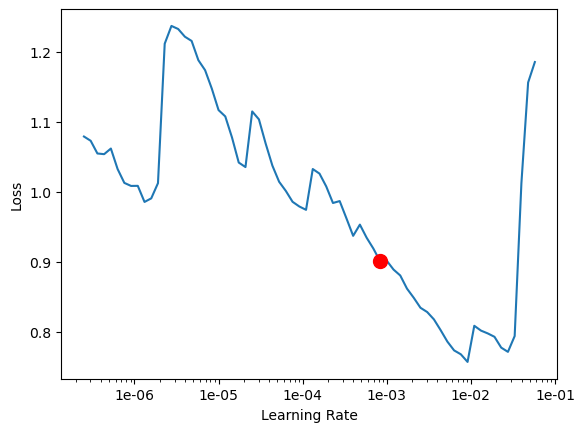

epoch,train_loss,valid_loss,average_precision,time
0,0.340938,0.265912,0.903817,01:24
1,0.334452,0.279296,0.908578,01:24
2,0.296104,0.246447,0.923125,01:24
3,0.307784,0.248526,0.915368,01:25
4,0.301938,0.236739,0.926407,01:25
5,0.304249,0.253466,0.921429,01:24
6,0.263350,0.250290,0.914837,01:25
7,0.291862,0.227850,0.931315,01:24
8,0.307806,0.223255,0.924826,01:25
9,0.259023,0.234859,0.924578,01:25


Epoch 26: early stopping


Computing model metrics...


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_FasterRCNN_RN50_TS416')

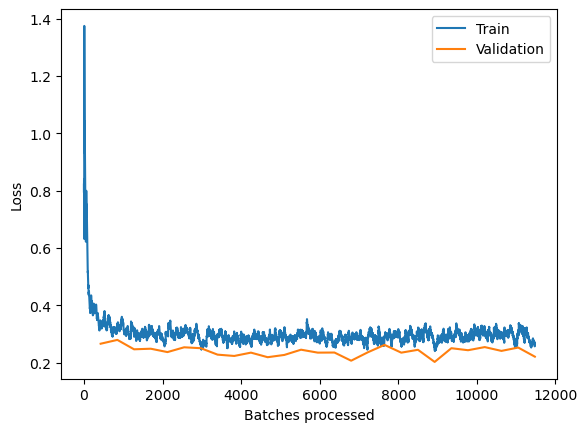

In [3]:
#Compare the Models using training data

#FasterRCNN
modelFRCNN = arcgis.learn.FasterRCNN(processedData, backbone='resnet50')
lrFRCNN = modelFRCNN.lr_find()
modelFRCNN.fit(200,lr=lrFRCNN, early_stopping=True)
modelFRCNN.average_precision_score()
modelFRCNN.plot_losses()
modelFRCNN.save(OutputModels + "UTMCarsV3_FasterRCNN_RN50_TS416", publish=False)

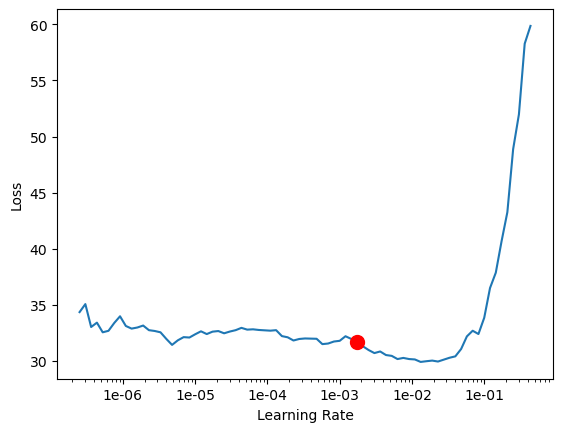

epoch,train_loss,valid_loss,average_precision,time
0,18.363754,17.184984,0.157016,02:29
1,17.256639,16.245178,0.208958,02:30
2,17.299206,15.643167,0.223355,02:30
3,15.938230,15.552614,0.246266,02:28
4,16.031153,16.263517,0.268022,02:31
5,15.648868,14.676589,0.322681,02:29
6,16.082411,14.118919,0.359803,02:28
7,15.341154,13.554363,0.339718,02:28
8,15.217369,13.181762,0.372846,02:28
9,14.266920,13.805142,0.365724,02:28


Epoch 38: early stopping


Computing model metrics...


Published DLPK Item Id: 872bab06b4b64c649ca6f03b1a962f3b


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_SSD_RN50_TS416')

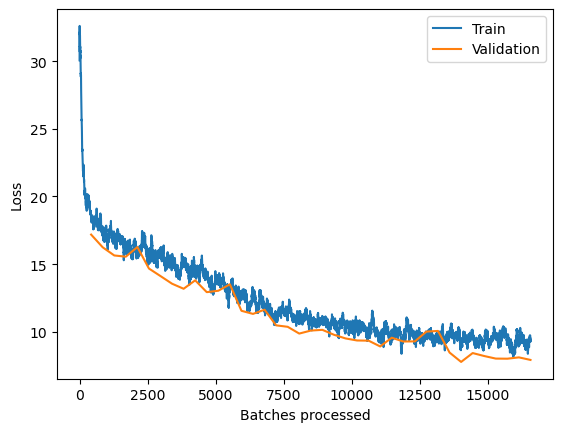

In [6]:
#SingleShotDetector
modelSSD = arcgis.learn.SingleShotDetector(processedData, backbone='resnet50')
lrSSD = modelSSD.lr_find()
modelSSD.fit(200,lr=lrSSD, early_stopping=True)
modelSSD.average_precision_score()
modelSSD.plot_losses()
modelSSD.save(OutputModels + "UTMCarsV3_SSD_RN50_TS416", publish=False)

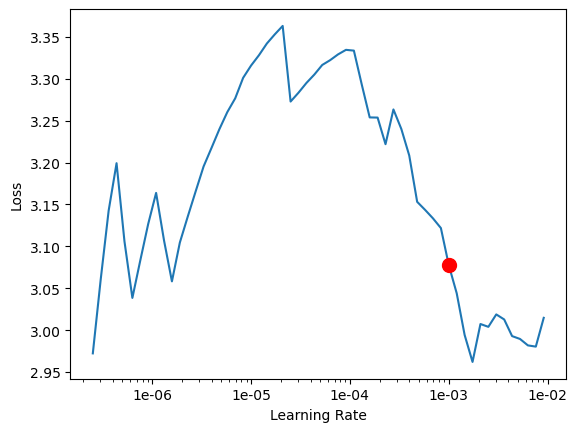

epoch,train_loss,valid_loss,average_precision,time
0,1.032218,1.136115,0.595826,01:04
1,0.802423,0.722430,0.624374,01:04
2,0.716626,0.662463,0.549875,01:04
3,0.672751,0.580542,0.746496,01:04
4,0.550843,0.713445,0.648829,01:04
5,0.527525,0.833766,0.500629,01:04
6,0.501572,0.750064,0.578148,01:04
7,0.491510,1.055500,0.279479,01:04
8,0.467879,1.022943,0.265936,01:04


Epoch 9: early stopping


Computing model metrics...


Published DLPK Item Id: ae461fc91ecb4bfb8431b16aba9c2426


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_Ret_RN50_TS416')

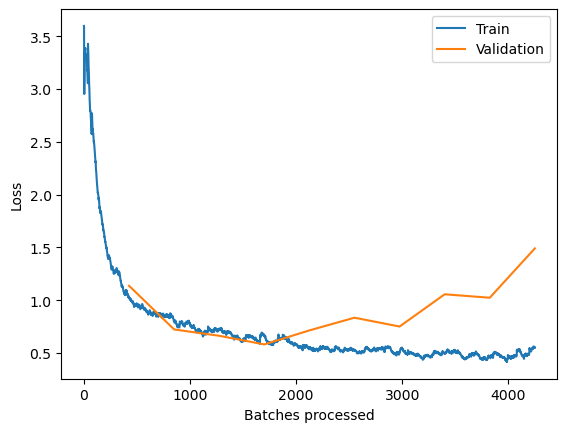

In [9]:
#RetinaNet
modelRet = arcgis.learn.RetinaNet(processedData, backbone='resnet50')
lrRet = modelRet.lr_find()
modelRet.fit(200,lr=lrRet, early_stopping=True)
modelRet.average_precision_score()
modelRet.plot_losses()
modelRet.save(OutputModels + "UTMCarsV3_Ret_RN50_TS416", publish=False)

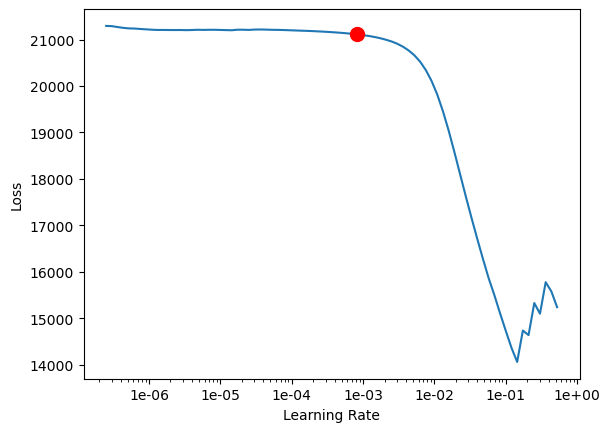

epoch,train_loss,valid_loss,average_precision,time
0,19577.156250,19314.279297,0.419628,03:49
1,16750.357422,16348.267578,0.680962,03:50
2,13024.115234,12542.612305,0.571165,03:51
3,8992.319336,8529.388672,0.305975,03:10
4,5398.738281,5024.044922,0.367605,03:10
5,2736.247314,2485.560059,0.326052,01:05
6,1143.861206,1013.887268,0.313329,01:05
7,402.604584,356.978485,0.391443,01:05
8,138.148605,127.737411,0.377245,01:05
9,62.766357,69.022560,0.455430,01:05


Epoch 33: early stopping


Computing model metrics...


Published DLPK Item Id: ccbdee20542b40148f3dc6c348639bec


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_YOLO_RN50_TS416')

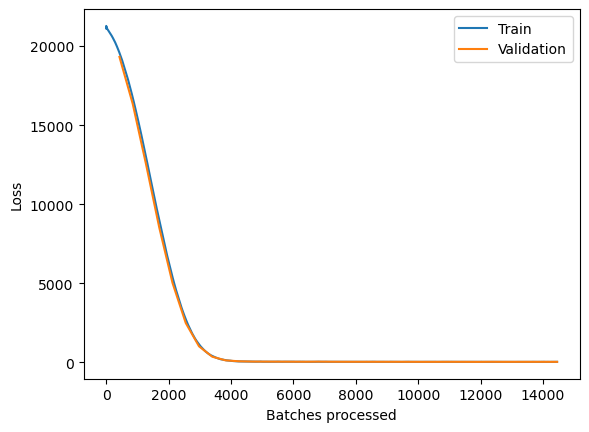

In [7]:
#YOLOv3
modelYOLO = arcgis.learn.YOLOv3(processedData, backbone='darknet53')
lrYOLO = modelYOLO.lr_find()
modelYOLO.fit(200,lr=lrYOLO, early_stopping=True)
modelYOLO.average_precision_score()
modelYOLO.plot_losses()
modelYOLO.save(OutputModels + "UTMCarsV3_YOLO_RN50_TS416", publish=False)

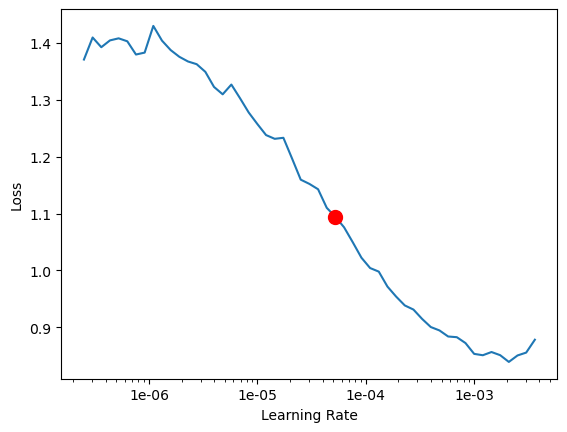

epoch,train_loss,valid_loss,average_precision,time
0,0.413166,0.388504,0.849936,02:53
1,0.348444,0.354000,0.866336,02:54
2,0.350022,0.334705,0.886483,02:54
3,0.328063,0.316543,0.894131,02:53
4,0.312960,0.302780,0.883647,02:53
5,0.300880,0.303967,0.900972,02:53
6,0.292487,0.287496,0.905894,02:54
7,0.290330,0.278447,0.910410,02:54
8,0.287774,0.263549,0.914019,02:53
9,0.272355,0.259928,0.920212,02:54


Epoch 26: early stopping


Computing model metrics...
Published DLPK Item Id: 0a1173ae07cc4c16b7fd7fb60ff4acab


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_MMD_RN50_TS416')

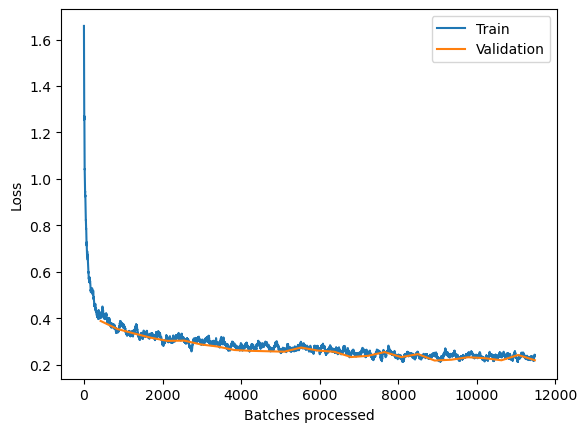

In [11]:
#MMDetection
modelMMD = arcgis.learn.MMDetection(processedData, model='cascade_rcnn')
lrMMD = modelMMD.lr_find()
modelMMD.fit(200,lr=lrMMD, early_stopping=True)
modelMMD.average_precision_score()
modelMMD.plot_losses()
modelMMD.save(OutputModels + "UTMCarsV3_MMD_RN50_TS416", publish=False)

epoch,train_loss,valid_loss,time
0,18.826689,15.134962,02:42
1,16.090340,14.111124,02:42
2,15.730551,14.310770,02:41
3,14.865042,13.279535,02:42
4,14.894432,12.412029,02:42
5,13.993830,11.636501,02:41
6,10.510609,8.229273,02:41
7,9.625258,7.487542,02:41
8,8.752668,7.403738,02:41
9,8.794663,7.310876,02:42


Epoch 44: early stopping


Computing model metrics...
Published DLPK Item Id: 6f5d7c9c2c3e44a0ab1001259e7faa64


WindowsPath('D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Pascal Comparisons/UTMCarsV3_DET_RN50_TS416')

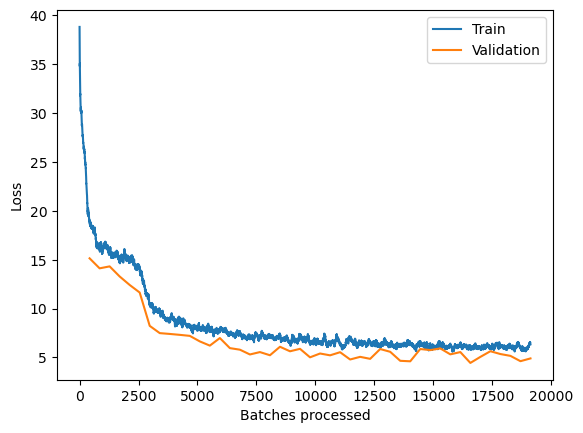

In [3]:
#DETReg
modelDET = arcgis.learn.DETReg(processedData, backbone='resnet50')
lrDET = modelDET.lr_find() 
modelDET.fit(200, lr=lrDET, early_stopping=True)
modelDET.average_precision_score()
modelDET.plot_losses()
modelDET.save(OutputModels + "UTMCarsV3_DET_RN50_TS416", publish=False)

In [10]:
modelFRCNN.supported_backbones

['resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'timm:adv_inception_v3',
 'timm:cspdarknet53',
 'timm:cspresnet50',
 'timm:cspresnext50',
 'timm:densenet121',
 'timm:densenet161',
 'timm:densenet169',
 'timm:densenet201',
 'timm:densenetblur121d',
 'timm:dla102',
 'timm:dla102x',
 'timm:dla102x2',
 'timm:dla169',
 'timm:dla34',
 'timm:dla46_c',
 'timm:dla46x_c',
 'timm:dla60',
 'timm:dla60_res2net',
 'timm:dla60_res2next',
 'timm:dla60x',
 'timm:dla60x_c',
 'timm:dm_nfnet_f0',
 'timm:dm_nfnet_f1',
 'timm:dm_nfnet_f2',
 'timm:dm_nfnet_f3',
 'timm:dm_nfnet_f4',
 'timm:dm_nfnet_f5',
 'timm:dm_nfnet_f6',
 'timm:dpn107',
 'timm:dpn131',
 'timm:dpn68',
 'timm:dpn68b',
 'timm:dpn92',
 'timm:dpn98',
 'timm:eca_nfnet_l0',
 'timm:eca_nfnet_l1',
 'timm:eca_nfnet_l2',
 'timm:ecaresnet101d',
 'timm:ecaresnet101d_pruned',
 'timm:ecaresnet269d',
 'timm:ecaresnet26t',
 'timm:ecaresnet50d',
 'timm:ecaresnet50d_pruned',
 'timm:ecaresnet50t',
 'timm:ecaresnetlight',
 'timm:efficientne

In [4]:
OutputModelsBK = 'D:/Research/MineRehabClassifications/DroneClassifications/UTMCars v3/Models/Backbone Comparisons/'

#Compare Backbones for a Model
BackbonesSUP = ("resnet18","resnet34","resnet50","resnet101","resnet152")
#Choose Supported vs Timm backbones
BackbonesAll = modelFRCNN.supported_backbones
BackbonesTIMM = [b for b in BackbonesAll if b not in BackbonesSUP]

BackboneResults : {}

print(BackbonesSUP)

for bkb in BackbonesSUP:
    modelFRCNN = arcgis.learn.FasterRCNN(processedData, backbone=bkb)
    lrFRCNN = modelFRCNN.lr_find(allow_plot=False)
    modelFRCNN.fit(200,lr=lrFRCNN, early_stopping=True)
    
    outputlog = OutputModelsBK + "UTMCarsV3_FasterRCNN_" + bkb + "_TS400/output.txt"
    %%capture cap --no-stderr
    with open(outputlog, 'w') as f:
        f.write(cap.stdout)
    
    #Option to save individual models
    modelFRCNN.save(OutputModelsBK + "UTMCarsV3_FasterRCNN_" + bkb + "_TS400", publish=False)

epoch,train_loss,valid_loss,average_precision,time
0,0.695175,0.620579,0.782918,01:56
1,0.541350,0.506768,0.864343,01:57
2,0.477372,0.474970,0.899281,01:57
3,0.501089,0.440053,0.877437,01:57
4,0.503448,0.411438,0.900193,01:56
5,0.416088,0.410296,0.891911,01:56
6,0.502757,0.389884,0.897335,01:57
7,0.469535,0.378718,0.908318,01:57
8,0.406730,0.363652,0.926589,01:57
9,0.416525,0.368167,0.912678,01:57


Epoch 25: early stopping
Computing model metrics...
